In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from wordcloud import WordCloud
import re
import hanja
from hanja import hangul
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Kkma, Komoran, Okt, Hannanum #Mecab은 윈도우에서 작동 불가능
from wordcloud import WordCloud
from time import time

from konlpy import tag
from konlpy.corpus import kolaw
# from konlpy.utils import csvwrite, pprint

In [3]:

Lyrics = pd.read_csv('C:/NLP/Lyrics.csv',encoding='cp949')
Lyrics = pd.DataFrame(Lyrics)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(Lyrics)
text_seq = tokenizer.texts_to_sequences(Lyrics)

pd.set_option('display.max_seq_items', 10000)
pd.set_option('display.max_row', 10000)
pd.set_option('display.max_columns', 10000)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
print(f'전체 학습 데이터 수: {len(Lyrics)}')

전체 학습 데이터 수: 200


In [ ]:
Lyrics['label'].value_counts()

0    50
1    50
3    50
2    50
Name: label, dtype: int64

In [ ]:
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()

In [ ]:
print(Lyrics['Lyrics'][0])

아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하고 있어 늦은 밤 졸린 눈 비비며 너에게 편지를 쓸게 반가운 사진 속 그 표정만큼 아름다운 나날들이기를 찬 바람이 불어와 어깨가 움추러들 때에도 너를 떠올린다면 씩씩한 표정 할수있어 알고있니 넌 나의 두근대는 맘은 아직까지 여기에 언제까지나 좋아한단 말은 나를 웃음짓게 해 때로는 지쳐 울어도 우 우 우 우 눈을 감으니 꼭 곁에 있는것 같아쨘 하고 나타날게생각치 못한 어느 날우연히 문득 뒤돌아 봤을 때그때 꼭 내가 서 있을게꼭 하고 껴안을게 가장 반가운 얼굴로눈물이 왈칵 쏟아진다해도나는 환하게 웃을거야혹시 오늘 너에게서러운 일이 생긴다면오래 전 그 날처럼 달려가꼭 안아주고파아름답게 빛나길알고있니 넌 나의 두근대는 맘은 아직까지 여기에언제까지나 좋아한단 말은 나를 웃음짓게 해 때로는 지쳐 울어도 눈을 감으니 꼭 곁에 있는것 같아 기억해줘 넌 나의 보고싶은 사람 이만 줄일게 안녕번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나는 여전히 너를 사랑하고 있다 나의 번호 나의 번호


In [1]:
# import textwrap
# data_list = []
# for i in Lyrics['Lyrics']:
#     result = textwrap.wrap(str(i))
#     data_list.append(result)
# print(data_list)



In [ ]:
# for i in Lyrics['Lyrics']:
#     print(kkma.morphs(str(i)))

print("[Kkma morphs 함수]")
print(kkma.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Okt 함수]") # 그나마 제일 단어가 깨지지 않음
print(okt.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Komoran 함수]")
print(komoran.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Hannanum 함수]")
print(hannanum.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')

[Kkma morphs 함수]
['아침', '에', '일어', '나', '너', '에게', '짧', '은', '인사', '를', '보내', 'ㄴ다', '아무리', '멀리', '떨어지', '어', '있', '어도', '나', '는', '넣', 'ㄹ', '생각', '하', '고', '있', '어', '늦', '은', '밤', '졸리', 'ㄴ', '눈', '비비', '며', '너', '에게', '편지', '를', '쓸', '게', '반갑', 'ㄴ', '사진', '속', '그', '표정', '만큼', '아름답', 'ㄴ', '나날', '들', '이', '기르', 'ㄹ', '찬', '바람', '이', '불어오', '아', '어깨', '가', '움추러들', 'ㄹ', '때', '에', '도', '너', '를', '떠올리', 'ㄴ다면', '씩씩', '하', 'ㄴ', '표정', '하', 'ㄹ', '수', '있', '어', '알', '고', '있', '니', '너', '는', '나의', '두근대', '는', '맘', '은', '아직', '까', '지', '여기', '에', '언제', '까지', '나', '좋아하', 'ㄴ단', '말', '은', '나르', 'ㄹ', '웃음', '짓', '게', '하', '어', '때로는', '지치', '어', '울', '어도', '우', '우', '우', '우', '눈', '을', '감', '으니', '꼭', '곁', '에', '있', '는', '것', '같', '아', '쨘', '하', '고', '나타나', 'ㄹ', '것', '이', '생각', '하', '지', '못하', 'ㄴ', '어느', '날', '우연히', '문득', '뒤돌', '아', '보', '았', '을', '때', '그때', '꼭', '나', '가', '스', '어', '있', '을게', '꼭', '하', '고', '껴안', '을', '것', '이', '가장', '반갑', 'ㄴ', '얼굴', '로', '눈물', '이', '왈칵', '쏟아지', 'ㄴ다', '하', '어도', '나', '

In [ ]:
# for i in Lyrics['Lyrics']:
#     print(kkma.morphs(str(i)))

['아침', '에', '일어', '나', '너', '에게', '짧', '은', '인사', '를', '보내', 'ㄴ다', '아무리', '멀리', '떨어지', '어', '있', '어도', '나', '는', '넣', 'ㄹ', '생각', '하', '고', '있', '어', '늦', '은', '밤', '졸리', 'ㄴ', '눈', '비비', '며', '너', '에게', '편지', '를', '쓸', '게', '반갑', 'ㄴ', '사진', '속', '그', '표정', '만큼', '아름답', 'ㄴ', '나날', '들', '이', '기르', 'ㄹ', '찬', '바람', '이', '불어오', '아', '어깨', '가', '움추러들', 'ㄹ', '때', '에', '도', '너', '를', '떠올리', 'ㄴ다면', '씩씩', '하', 'ㄴ', '표정', '하', 'ㄹ', '수', '있', '어', '알', '고', '있', '니', '너', '는', '나의', '두근대', '는', '맘', '은', '아직', '까', '지', '여기', '에', '언제', '까지', '나', '좋아하', 'ㄴ단', '말', '은', '나르', 'ㄹ', '웃음', '짓', '게', '하', '어', '때로는', '지치', '어', '울', '어도', '우', '우', '우', '우', '눈', '을', '감', '으니', '꼭', '곁', '에', '있', '는', '것', '같', '아', '쨘', '하', '고', '나타나', 'ㄹ', '것', '이', '생각', '하', '지', '못하', 'ㄴ', '어느', '날', '우연히', '문득', '뒤돌', '아', '보', '았', '을', '때', '그때', '꼭', '나', '가', '스', '어', '있', '을게', '꼭', '하', '고', '껴안', '을', '것', '이', '가장', '반갑', 'ㄴ', '얼굴', '로', '눈물', '이', '왈칵', '쏟아지', 'ㄴ다', '하', '어도', '나', '는', '환하', '게', '웃

KeyboardInterrupt: 

In [ ]:
#명사만 추출

print("[Kkma nouns 함수]")
print(kkma.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[OKt nouns 함수]") # 제일 잘 표현
print(okt.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Komoran nouns 함수]")
print(komoran.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Hannanum nouns 함수]")
print(hannanum.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')

[Kkma nouns 함수]


In [ ]:
# word_vocab = tokenizer.word_index
# print(word_vocab)

In [ ]:
def preprocessing(lyric,okt,remove_stopwords=False,stop_words=[]):
    text=re.sub('[^가-힣a-zA-Zㄱ-ㅎㅏ-ㅣ\\s]',' ',str(Lyrics['Lyrics']))

    lyric_word=okt.morphs(text,stem=True)
    # ㄴ 단어를 더 정확하게 나눌 수 있는 방법이 있다면 적용하기 (형태소-morphs/명사-nouns)
    
    if remove_stopwords:
        lyric_word=[token for token in lyric_word if not token in stop_words]
    
    return lyric_word

stop_words=['예컨대','하면','아니거든','어찌하든지','같다','비슷하다',
'에게','하고','를','은','는','이','가','하','아','것','들',
'의','있','되','수','보','주','등','으로','에','서','로',
'도','에서','있다','하다','와','되다','과','보다','이','있','하','것','들','그',
'되','수','이','보','않','없','나','사람','주','아니','등','같','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두',
'말하','알','그러나','받','못하','일','그런','또','문제','더','사회','많','그리고','좋','크','따르','중','나오',
'가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','안','어떤','내','내','경우','명',
'다시','이런','앞','보이','번','나','다른','어떻','개','전','들','사실','이렇','점','싶','말','정도','좀',
'원','잘','통하','놓','우','이기','며','어도','이만','이기','만큼','들다','에도']
# ㄴ 불용어 사전 업데이트 필요
# 시간, 그녀, 생각, 소리, 우리, 여자, 자신 => 키워드는 포함 x

okt=Okt()
clean_train=[]

for lyric in Lyrics['Lyrics']:
    if type(lyric)==str:
        clean_train.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train.append([])


print(len(clean_train))
print(clean_train[:])

# for i in Lyrics['Lyrics']:
#     print(kkma.morphs(str(i)))


200
[['아침', '일어나다', '너', '짧다', '인사', '보내다', '아무리', '멀리', '떨어지다', '널', '생각', '라라', '랄라', '라라', '랄라', '워', '어', '워', '어', '너', '맛있다', '살구', '빛', '샐러드', '맛있다', '먹다', '자꾸', '마주치다', '네', '눈빛', '왠지', '어색하다', '대체', '왜', '이렇다', '고개', '숙이다', '너', '발끝', '맘', '어깨동무', '까진', '괜찮다', '그치다', '손', '잡다', '건', '조금', '위험하다', '자라다', '메다', '괜찮다', '그래도', '자다', '햇살', '가득', '대다', '향', '가볍다', '발걸음', '콧노래', '부르다', '쇼', '윈도', '비치다', '모습', '을', '한번', '점검', '해시', '세상', '가장', '행복하다', '그래서', '더욱', '듣다', '고프다', '고맙다', '날', '살리다', '사랑', '해', '대다', '정', '사랑', '그게', '뭔', '아직도', '궁금하다', '생각', '답', '멀어지다', '만가', '모르다', '돌다', '널', '바', '래', '다', '주다', '길', '내내', '변하다', '널', '생각', '않다', '너', '투덜대다', '언제나', '만남', '이란', '상상', '만으로도', '눈부시다', '낭만', '시작', '잔', '진하다', '설레임', '향기', '온', '몸', '퍼지다', '장난스럽다', '너', '속삭임', '마음', '을', '알아차리다', '신기루', '사랑', '유혹', '너', '나르다', '가두다', '두다', '뭔가', '기분', '좋다', '일이', '생기다', '만', '기분', '이야', '요즘', '따르다', '만', '나르다', '알아보다', '연', '코코', '노로', '카타', '치카', '라나', '코노', '마마', '도시', '테', '모이', '나니', 

In [ ]:
print('행복 리뷰 갯수: {}'.format(Lyrics['label'].value_counts()[0]))
# print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

행복 리뷰 갯수: 50


In [ ]:
# train_length=[]
# for lst in clean_train:
#     train_length.append(len(lst))

# print('길이 최댓값: {}'.format(np.max(train_length)))
# print('길이 최솟값: {}'.format(np.min(train_length)))
# print('길이 평균값: {:.2f}'.format(np.mean(train_length)))
# print('길이 중간값: {}'.format(np.median(train_length)))

길이 최댓값: 147
길이 최솟값: 147
길이 평균값: 147.00
길이 중간값: 147.0


In [ ]:
# 중간값으로 max sequence length 적용
MAX_SEQUENCE_LENGTH=int(np.median(train_length))

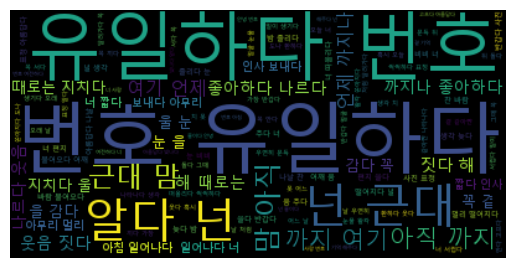

In [ ]:
wordcloud_lst = sum(clean_train, [])

wordcloud=WordCloud(font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(wordcloud_lst))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
# import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
# device = torch.device("cuda:0")

c:\Users\YUJIN\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5  
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [6]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split

Lyric_train, Lyric_test = train_test_split(Lyrics, test_size=0.2, shuffle=True, random_state=111, stratify=Lyrics['label'])

In [11]:
# !pip install git+https://git@github.com/SKTBrain/KoBERT.git@master
from kobert.pytorch_kobert import get_kobert_model
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

ModuleNotFoundError: No module named 'kobert'

SyntaxError: invalid syntax (3512468708.py, line 2)